In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


dependent feature will be average and rest of will be features 

In [2]:
df['average_score'] = ((df['math_score'] + df['reading_score'] + df['writing_score'])/3).round(2)

X=df.drop(['average_score'],axis=1)
Y=df['average_score']

In [3]:
numFeatures= df.select_dtypes(exclude='object').columns
catFeatures= df.select_dtypes(include='object').columns

numFeatures = numFeatures.drop('average_score')

from sklearn.preprocessing import StandardScaler,OneHotEncoder

numTransformer = StandardScaler()
catTransformer = OneHotEncoder()

from sklearn.compose import ColumnTransformer

transForm = ColumnTransformer(
    [
        ('OneHotencoder',catTransformer,catFeatures),
        ('StandardScaler',numTransformer,numFeatures)
    ]
)

X = transForm.fit_transform(X)


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 20), (800,), (200, 20), (200,))

In [6]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def Eval(actual, predicted):
    mse = mean_squared_error(actual,predicted)
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)
    return mse,mae,r2

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'DecisionTree': DecisionTreeRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'XGBoost': XGBRegressor()
}

modelList = models.keys()
r2_scores=[]
best_model = None
for name,model in models.items():
    if isinstance(model, CatBoostRegressor):
        model.fit(x_train,y_train)
    else:
        model.fit(x_train,y_train)
    yPred= model.predict(x_test)
    mse,mae,r2 = Eval(y_test,yPred)
    r2_scores.append(r2)
    print(f'''{name} 
           mse: {mse} ,
           mae: {mae} ,
           r2: {r2}''')
    print('-'*30)

best_model = list(modelList)[r2_scores.index(max(r2_scores))]
print(f'Best Model is {best_model} with R2 Score of {max(r2_scores)}')


LinearRegression 
           mse: 7.01473194758038e-06 ,
           mae: 0.002158098240913056 ,
           r2: 0.9999999672774438
------------------------------
Ridge 
           mse: 8.754353502714127e-05 ,
           mae: 0.007314586177978803 ,
           r2: 0.9999995916239893
------------------------------
Lasso 
           mse: 1.2416796423199172 ,
           mae: 0.8769183237190569 ,
           r2: 0.9942077712680123
------------------------------
RandomForest 
           mse: 1.4149336201999956 ,
           mae: 0.5280309999999973 ,
           r2: 0.9933995703163294
------------------------------
GradientBoosting 
           mse: 0.9176471870029357 ,
           mae: 0.5456587355108078 ,
           r2: 0.9957193287050633
------------------------------
SVR 
           mse: 29.170881311962322 ,
           mae: 1.4138396213281286 ,
           r2: 0.8639226970357147
------------------------------
DecisionTree 
           mse: 2.5308705000000002 ,
           mae: 1.12345 ,
           

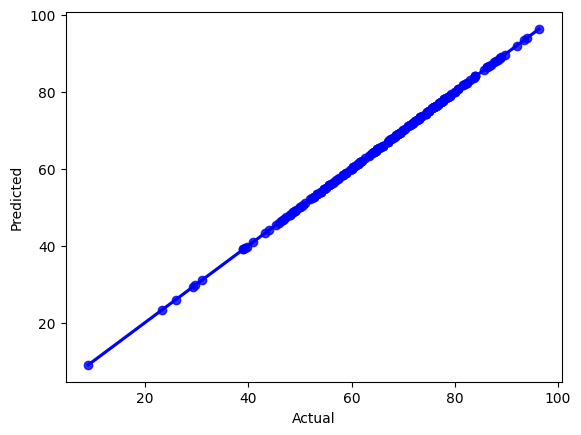

In [8]:
reg = LinearRegression()
reg.fit(X,Y)
yPred = reg.predict(x_test)

sns.regplot(x=y_test , y=yPred , ci=None , color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [9]:
predicted_df = pd.DataFrame({'Actual':y_test,'Predicted':yPred , 'Difference':np.abs(y_test-yPred)})
predicted_df.describe()


,Actual,Predicted,Difference
count,200.000000,200.000000,200.000000
mean,66.176550,66.176577,0.002097
std,14.678118,14.677985,0.001535
min,9.000000,8.999720,0.000017
25%,56.247500,56.249619,0.000314
50%,68.165000,68.166648,0.002925
75%,76.415000,76.416949,0.003417
max,96.330000,96.332805,0.004207
